#      ****     SENTIMENT ANALYSIS OF TWEETS       ****

In [6]:
import re
import csv
import string
import numpy as np
import pandas as pd
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
from porter_stemmer import PorterStemmer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


### Data Reading

In [7]:
data = pd.read_csv("./input_data/tweet_data.csv",names = ["sentiment","date","user","xgfg","dxgfd","tweet"] , encoding='latin-1')
data = data.drop(columns=["date","user","xgfg","dxgfd"])
data.head(10)
print (data.iloc[:10,:])

   sentiment                                              tweet
0          0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          0  is upset that he can't update his Facebook by ...
2          0  @Kenichan I dived many times for the ball. Man...
3          0    my whole body feels itchy and like its on fire 
4          0  @nationwideclass no, it's not behaving at all....
5          0                      @Kwesidei not the whole crew 
6          0                                        Need a hug 
7          0  @LOLTrish hey  long time no see! Yes.. Rains a...
8          0               @Tatiana_K nope they didn't have it 
9          0                          @twittera que me muera ? 


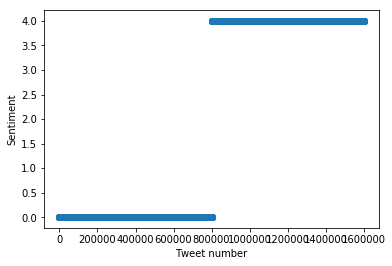

In [50]:
y = data['sentiment']
x = range(len(data))
plt.scatter(x,y)
plt.xlabel("Tweet number")
plt.ylabel("Sentiment")
plt.plot()
plt.show()

### Cleaning of data

In [8]:
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #remove @username
    tweet = re.sub('@[^\s]+','',tweet)
    
#     # Remove tickers
#     tweet = re.sub(r'\$\w*', '', tweet)
    
    # To lowercase
    tweet = tweet.lower()
    
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
#     tweet = re.sub(r'#\w*', '', tweet)

    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', tweet)
    
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = re.sub(' +', ' ',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')  
    
    # Removing Stopwords from tweet using sklearn.feature_extraction
    split_list = tweet.split(" ")
    tweet = [ word for word in split_list if word not in stop_words.ENGLISH_STOP_WORDS ]
    
    # Stemming the 
    ps = PorterStemmer()
    tweet = [ ps.stem(word) for word in tweet ]
    tweet = ' '.join(tweet)
    return tweet


processed_data = list()

for index, row in data.iterrows():
    processed_data.append(processTweet(row['tweet']))
    
# data['processed'] = processed_data
# data.head()                                    

In [10]:
data['processed'] = processed_data
data.head()

,sentiment,tweet,processed
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda got david carr dai
1,0,is upset that he can't update his Facebook by ...,upset updat facebook tex result school todai b...
2,0,@Kenichan I dived many times for the ball. Man...,dive time ball manag save rest bound
3,0,my whole body feels itchy and like its on fire,bodi feel itchi like
4,0,"@nationwideclass no, it's not behaving at all....",behav mad


### Train-Test-Validation Split

In [19]:
X = data['processed']
Y = data['sentiment']
X_train_val, X_test , Y_train_val, Y_test = train_test_split(X,Y,test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.25)



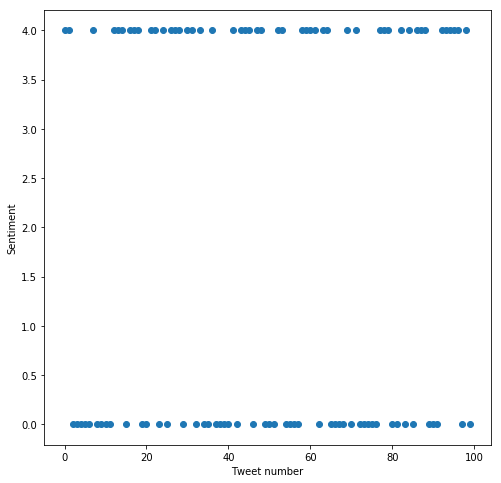

In [58]:
plt.figure(figsize=(8,8))
y = Y_train[:100]
x = range(len(Y_train[:100]))
plt.scatter(x,y)
plt.xlabel("Tweet number")
plt.ylabel("Sentiment")
plt.plot()
plt.show()

### Creating Files For Train,Test and Validation Data

In [12]:
train_df = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)
train_df.to_csv("./input_data/train_df.csv", sep=',')         

validation_df = pd.concat([X_val, Y_val],axis='columns').reset_index(drop=True)
validation_df.to_csv("./input_data/validation_df.csv", sep=',')

test_df = pd.concat([X_test, Y_test],axis='columns').reset_index(drop=True)
test_df.to_csv("./input_data/test_df.csv", sep=',')

In [9]:
def wordle(df):
    all_words = []
    for line in df['processed']:
        try:
            all_words.extend(line.split())
        except:
            pass
    text = " ".join(all_words)
    wordcloud = WordCloud().generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
# negative_df= df[df['sentiment']==0].reset_index(drop=True)
# positive_df = df[df['sentiment']==4].reset_index(drop=True)
# wordle(df)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
train_df = pd.read_csv("./input_data/train_df.csv")

vectorizer = CountVectorizer()
X_train = train_df['processed']
X_train = X_train[:100]
VC_train = vectorizer.fit_transform(X_train.values.astype('U'))

In [49]:
val_df = pd.read_csv("./input_data/validation_df.csv")
X_val = val_df['processed'][:200]
VC_val = vectorizer.fit_transform(X_val.values.astype('U'))

gnb = GaussianNB()
model_nb = gnb.fit(VC_train.todense(), Y_train[:100])
Y_pred = model_nb.predict(VC_val.todense())

(200, 797)
(200, 797)


ValueError: operands could not be broadcast together with shapes (200,797) (491,) 

In [12]:
# tfidf = TfidfVectorizer()
# features = tfidf.fit_transform(X_train)
# print (features)



  (0, 174240)	0.2413243318571412
  (0, 24012)	0.2713369749038635
  (0, 148317)	0.3314144375781771
  (0, 172582)	0.428213932983034
  (0, 109052)	0.23827451727710805
  (0, 101795)	0.29898501681432677
  (0, 39542)	0.3590078921381936
  (0, 126320)	0.25644102567420435
  (0, 136091)	0.30601943843644686
  (0, 147882)	0.3747969613500881
  (1, 161954)	0.2619983181785407
  (1, 65268)	0.22165012590920238
  (1, 94096)	0.1457096369806136
  (1, 43605)	0.3104860137153065
  (1, 154133)	0.21184429953581957
  (1, 41927)	0.13693288774513504
  (1, 166630)	0.18737714388638274
  (1, 117198)	0.35572265136219866
  (1, 39734)	0.36059998952394784
  (1, 67388)	0.5105180136222788
  (1, 122654)	0.2975258657128238
  (1, 130683)	0.2452247596661462
  (2, 130683)	0.36836743657028304
  (2, 152849)	0.23533125268915317
  (2, 67954)	0.2960518270914764
  :	:
  (959996, 23330)	0.2765055267163925
  (959996, 165006)	0.287655600890024
  (959996, 65068)	0.4262177054680919
  (959997, 156217)	0.19266956568546492
  (959997, 65198)

In [26]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# pipeline = Pipeline([
#   ('counts', CountVectorizer()),
#   ('tf_idf', TfidfTransformer()),
#   ('classifier', GaussianNB())
# ])
# pipeline.fit(np.array(X_train), Y_train)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [13]:
# def tokenize(str):
#     return str.split(" ")

# def stemming(list_of_tokens):
#     ps = PorterStemmer()
#     return [ ps.stem(word) for word in list_of_tokens ] 

# word_list = []
# for st in data.iloc[:10,1]:
#     tokens = tokenize(st)
#     stemmed = stemming(tokens)
#     for wd in stemmed:
#         if wd in ENGLISH_STOP_WORDS:
# #             print wd
#             stemmed.remove(wd)
#         if wd == '':
#             stemmed.remove(wd)
#     word_list += [stemmed]
    
# print word_list

In [7]:
# def remove_pattern(input_txt, pattern): 
#     r = re.findall(pattern, input_txt)
#     for i in r:
#         input_txt = re.sub(i, '', input_txt)
        
#     return input_txt

# # remove twitter handles (@user)
# data.iloc[:10,1] = np.vectorize(remove_pattern)(data.iloc[:10,1], "@[\w]*")
# print (data.iloc[:10,1])

# # # remove url
# # data.iloc[:10,1] = np.vectorize(remove_pattern)(data.iloc[:10,1],)# "^https?:\/\/.*[\r\n]*")#, text, flags=re.MULTILINE))
# # print (data.iloc[:10,1])

# # remove special characters, numbers, punctuations
# data.iloc[:10,1] = data.iloc[:10,1].str.replace("[^a-zA-Z#]", " ")
# print (data.iloc[:10,1])